# Logistic Regression - Quick Notes

from IPython.display import Markdown, display

## 🧠 Intuition

Logistic Regression estimates the probability that a given input belongs to a particular class using the **sigmoid function**.

\[
P(y=1|x) = \frac{1}{1 + e^{-(w^Tx + b)}}
\]

- \( w \): weights  
- \( x \): input features  
- \( b \): bias  
- If output ≥ 0.5 → class 1; else → class 0

---

## ✅ Key Features

- Linear decision boundary  
- Probabilistic interpretation  
- Easy to implement and fast  
- Regularization (L1, L2) helps prevent overfitting

---


In [26]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np 

iris = load_iris()
X, y = load_digits(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter = 20)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9611111111111111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      0.96      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.96      0.95        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.85      0.93      0.89        30
           9       0.97      0.90      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



/home/trunght/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/trunght/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


In [31]:
y

array([0, 1, 2, ..., 8, 9, 8])

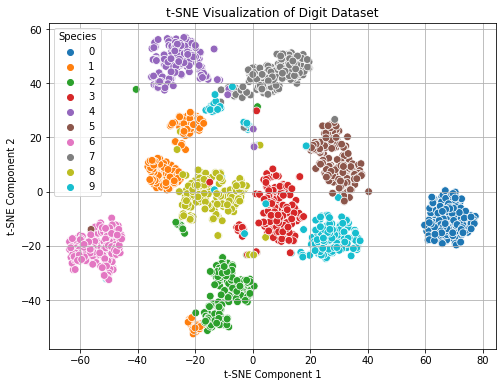

In [32]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue = y, palette="tab10", legend="full", s=60)
plt.title("t-SNE Visualization of Digit Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Species")
plt.grid(True)
plt.show()

🌳 Decision Trees
A tree-like model that splits data based on feature values to make decisions.
Each internal node = a decision on a feature
Each leaf node = a prediction (class or value)
Can handle categorical and numerical data.
Prone to overfitting if not pruned or limited in depth.

Pros:
✔️ Easy to interpret
✔️ No need for feature scaling
✔️ Works with non-linear relationships

Cons:
❌ Overfits easily
❌ Unstable with small data changes

🌲 Random Forests
An ensemble of many decision trees trained on different random subsets of data and features.
Combines predictions (majority vote for classification, average for regression).
Reduces overfitting and increases accuracy and stability.

Pros:
✔️ High accuracy
✔️ Robust to noise and overfitting
✔️ Handles large datasets well

Cons:
❌ Less interpretable
❌ Slower to predict than a single tree

Accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



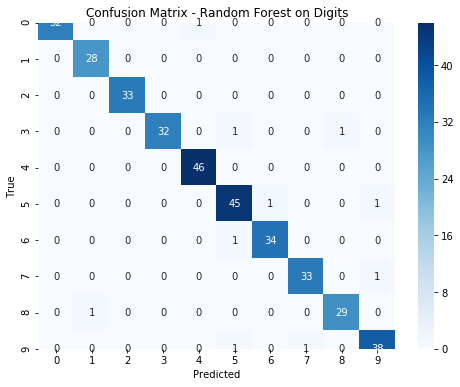

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest on Digits')
plt.show()

In [36]:
from sklearn.svm import SVC

# Create and train SVM classifier
svm = SVC(kernel='rbf', C=10, gamma=0.001)  # RBF kernel works well for image-like data
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [37]:
🧠 Naive Bayes – Summary
Naive Bayes is a simple yet powerful probabilistic classifier based on Bayes' Theorem, assuming feature independence (hence “naive”).

🔹 Bayes' Theorem
P(Y|X) = \frac{P(X|Y) \cdot P(Y)}{P(X)}
P(Y∣X)= 
P(X)
P(X∣Y)⋅P(Y)
​
 
Where:

P(Y|X)P(Y∣X): Posterior probability of class given features

P(X|Y)P(X∣Y): Likelihood

P(Y)P(Y): Prior probability of the class

P(X)P(X): Marginal likelihood of features (can be ignored during classification)

SyntaxError: invalid character in identifier (<ipython-input-37-b4d0d21acac7>, line 1)